In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## EDA

In [2]:
# Load the data
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

req = requests.get(url)

if req.status_code == 200:
    df = pd.read_csv(StringIO(req.text))
    print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


<Axes: xlabel='median_house_value', ylabel='Count'>

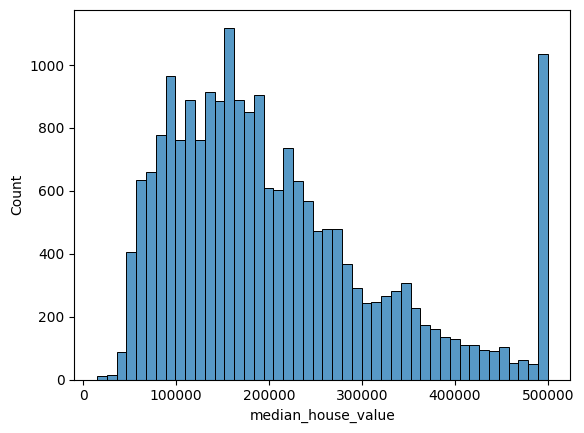

In [3]:
# Look at the median_house_value variable. Does it have a long tail?
sns.histplot(data=df, x=df['median_house_value'] )

In [4]:
mean_value = df['median_house_value'].mean()
median_value =df['median_house_value'].median()
std_value = df['median_house_value'].std()

print(f"mean value: ${mean_value.round()}")
print(f"median value: ${median_value.round()}")
print(f"std value: ${std_value.round()}")

mean value: $206856.0
median value: $179700.0
std value: $115396.0


Yes the median_house_value variabe have a long tail

In [5]:
# Keep only the records where ocean_proximity is '<1H OCEAN' or 'INLAND'
subset_data = df[(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]

# Use only the specified columns
selected_columns = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value'
]

subset_data = subset_data[selected_columns]
subset_data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


## Question 1

In [6]:
# There's one feature with missing values. What is it?
subset_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [7]:
subset_data.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

total_bedrooms features

## Question 2

In [8]:
# What's the median (50% percentile) for variable 'population'?
subset_data['population'].median()

1195.0

### Prepare and split the dataset

In [9]:
np.random.seed(42)

n = len(subset_data)

test_n = int(n * 0.2)
val_n = int(n * 0.2)
train_n = n - (test_n + val_n)

In [10]:
n, test_n + val_n + train_n

(15687, 15687)

In [11]:
test_n, val_n, train_n

(3137, 3137, 9413)

In [12]:
idx = np.arange(n)
np.random.shuffle(idx)

subset_shuffled = subset_data.iloc[idx]
subset_shuffled.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [13]:
df_train = subset_shuffled[:train_n].copy()
df_val = subset_shuffled[train_n:train_n+val_n].copy()
df_test = subset_shuffled[train_n+val_n:].copy()

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

In [16]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

In [17]:
print(f"Missing values df_train: {df_train['total_bedrooms'].isnull().sum()}")
print(f"Missing values df_val: {df_val['total_bedrooms'].isnull().sum()}")
print(f"Missing values df_test: {df_test['total_bedrooms'].isnull().sum()}")

Missing values df_train: 94
Missing values df_val: 29
Missing values df_test: 34


In [18]:
# Fill missing value with 0
df_train_zero = df_train.fillna(0)
df_val_zero = df_val.fillna(0)
df_test_zero = df_test.fillna(0)

# Fill missig value with mean
df_train_mean = df_train.fillna(df_train['total_bedrooms'].mean())
df_val_mean = df_val.fillna(df_val['total_bedrooms'].mean())
df_test_mean = df_test.fillna(df_test['total_bedrooms'].mean())

In [19]:
# Linear Regression without Regularization
def linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [20]:
# For 0 value
w_0, w = linear_regression(df_train_zero.values, y_train)
y_pred_zero = w_0 + df_train_zero.values.dot(w)

# For mean value
w_0, w = linear_regression(df_train_mean.values, y_train)
y_pred_mean = w_0 + df_train_mean.values.dot(w)

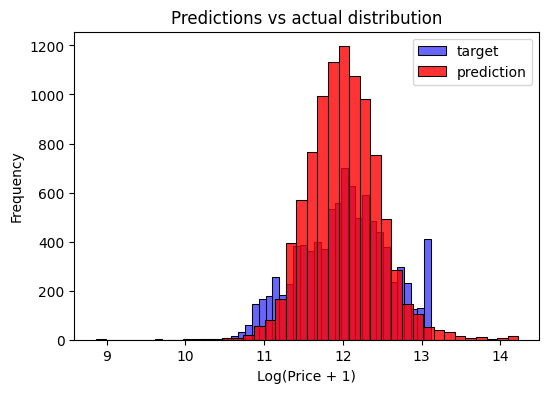

In [21]:
# for zero values
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred_zero, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

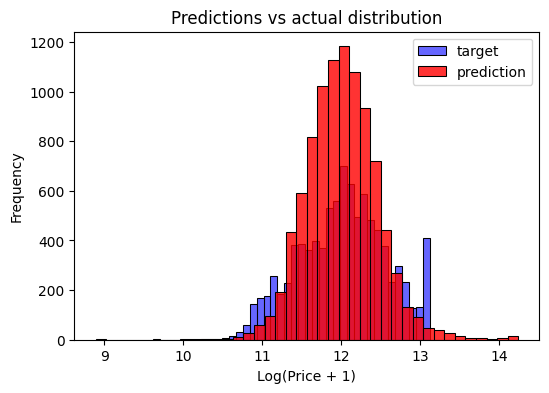

In [22]:
# For mean values
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred_mean, label='prediction', color='red', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [23]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [24]:
print(f"RMSE with 0 value: {round(rmse(y_train, y_pred_zero),2)}")

RMSE with 0 value: 0.34


In [25]:
print(f"RMSE with 0 value: {round(rmse(y_train, y_pred_mean),2)}")

RMSE with 0 value: 0.34


Both are equally good

## Question 4

In [26]:
def regularize_linear_regression(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
# For 0 values
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in r_values:
    w_0, w = regularize_linear_regression(df_train_zero.values, y_train, r=r)
    y_pred = w_0 + df_val_zero.values.dot(w)
    score = rmse(y_val, y_pred)
    print('RMSE for r = %5s is %s'% (r, round(score, 2)))


RMSE for r =     0 is 0.34
RMSE for r = 1e-06 is 0.34
RMSE for r = 0.0001 is 0.34
RMSE for r = 0.001 is 0.34
RMSE for r =  0.01 is 0.34
RMSE for r =   0.1 is 0.34
RMSE for r =     1 is 0.34
RMSE for r =     5 is 0.35
RMSE for r =    10 is 0.35


smallest r = 0



## Question 5

In [28]:
def prepare_X(df, fillna_value):
    df_num = df[subset_data.columns.drop('median_house_value')]
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [29]:
def rmse_score(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [30]:
rmse_list = []
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in seed_values:
    
    n = len(subset_data)
    test_n = int(n * 0.2)
    val_n = int(n * 0.2)
    train_n = n - (test_n + val_n)

    idx = np.arange(n)
    np.random.seed(n)
    np.random.shuffle(idx)
    
    subset_shuffled = subset_data.iloc[idx]

    df_train = subset_shuffled[:train_n].copy()
    df_val = subset_shuffled[train_n:train_n+val_n].copy()
    df_test = subset_shuffled[train_n+val_n:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_null_train = prepare_X(df_train, fillna_value=0)
    w_0, w = linear_regression(X_null_train, y_train)
    
    X_null_val = prepare_X(df_val, fillna_value=0)
    y_pred = w_0 + X_null_val.dot(w)
    score = np.round(rmse_score(y_val, y_pred),2)
    
    rmse_list.append(score)
    
    print(r, w_0, score)

10 -9.5531768909531 0.34
10 -9.5531768909531 0.34
10 -9.5531768909531 0.34
10 -9.5531768909531 0.34
10 -9.5531768909531 0.34
10 -9.5531768909531 0.34
10 -9.5531768909531 0.34
10 -9.5531768909531 0.34
10 -9.5531768909531 0.34
10 -9.5531768909531 0.34


In [31]:
rmse_list

[0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34, 0.34]

In [32]:
np.round(np.std(rmse_list),3)

0.0

## Question 6

In [33]:
r = 9

n = len(subset_data)
test_n = int(n * 0.2)
val_n = int(n * 0.2)
train_n = n - (test_n + val_n)

idx = np.arange(n)
np.random.seed(n)
np.random.shuffle(idx)

subset_shuffled = subset_data.iloc[idx]

df_train = subset_shuffled[:train_n].copy()
df_val = subset_shuffled[train_n:train_n+val_n].copy()
df_test = subset_shuffled[train_n+val_n:].copy()

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [34]:
X_null_train = prepare_X(df_train, fillna_value=0)
w0_train_val, w_train_val = regularize_linear_regression(X_null_train, y_train, r=0.001)

X_null_test = prepare_X(df_test, fillna_value=0)
y_null_pred_test = w0_train_val + X_null_test.dot(w_train_val)

np.round(rmse_score(y_test, y_null_pred_test),2)

0.35